In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 시각화 작업에 필요한 패키지와 라이브러리를 설치한다.
# !pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프를 쥬피터 노트북 내부에 표시하기 위해 설정한다.
%matplotlib inline
# 한글 폰트를 사용할 때 마이너스 데이터가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
mpl.font_manager._rebuild()

In [4]:
# 그래프를 그리기 위해 더미 데이터를 만든다.
data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -19,   -2,  -31,  -46,  -26,  -61,   35,   18,   66,  110,   77,
        159,  228,  321,  265,  297,  342,  253,  255,  200,  109,   24,
         41,   -1,  -94, -113,  -61,   19,  -14,   70,   94,  189,  166,
        164,   67,  100,   36,  -33,   62,  -32, -131, -185, -191, -176,
        -81,  -72,  -94,  -37, -134, -171], dtype=int32)

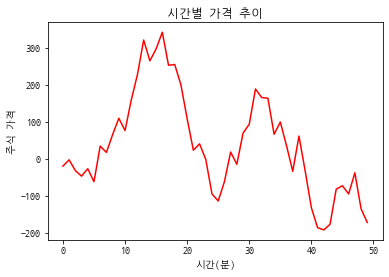

In [5]:
# matplotlib의 기본 폰트로 지정되어있기 때문에 한글이 깨져서 보인다.
plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (20, 7) # 차트 크기
plt.title('시간별 가격 추이') # 차트 제목
plt.ylabel('주식 가격')       # y축 제목
plt.xlabel('시간(분)')        # x축 제목
plt.show()

In [6]:
# 폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 위치 정보를 확인한다.
print('버전 : ', mpl.__version__)
print('설치 위치 : ', mpl.__file__)
print('설정 위치 : ', mpl.get_configdir())
print('캐시 위치 : ', mpl.get_cachedir())

버전 :  3.3.4
설치 위치 :  d:\python36\lib\site-packages\matplotlib\__init__.py
설정 위치 :  C:\Users\admin\.matplotlib
캐시 위치 :  C:\Users\admin\.matplotlib


In [7]:
# matplotlib의 위치 정보를 알았으니 설정 파일의 위치를 확인한다.
print('설정 파일 위치 : ', mpl.matplotlib_fname())

설정 파일 위치 :  d:\python36\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [8]:
# 컴퓨터에 설치된 폰트 목록을 얻어온다.
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

786
['C:\\Windows\\Fonts\\BASKVILL.TTF', 'C:\\WINDOWS\\Fonts\\FTLTLT.TTF', 'C:\\WINDOWS\\Fonts\\BOD_BLAR.TTF', 'C:\\WINDOWS\\Fonts\\gadugi.ttf', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\PERTILI.TTF', 'C:\\Windows\\Fonts\\BOD_I.TTF', 'C:\\Windows\\Fonts\\CALIFB.TTF', 'C:\\Windows\\Fonts\\cambriaz.ttf', 'C:\\WINDOWS\\Fonts\\segoeuii.ttf']


In [9]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

824
['DejaVu Serif', 'cmtt10', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans Mono', 'cmex10', 'STIXSizeFiveSym', 'STIXSizeThreeSym']


In [10]:
# 나눔 글꼴을 사용할 예정이므로 이름에 'Nanum'이 포함된 폰트만 가져온다.
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothicCoding', 'C:\\Windows\\Fonts\\나눔고딕코딩.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\나눔고딕코딩-Bold.ttf'),
 ('NanumGothicCoding', 'C:\\Windows\\Fonts\\나눔고딕코딩-Bold.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\나눔고딕코딩.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf')]

한글 폰트를 사용하는 방법은 3가지가 있다.

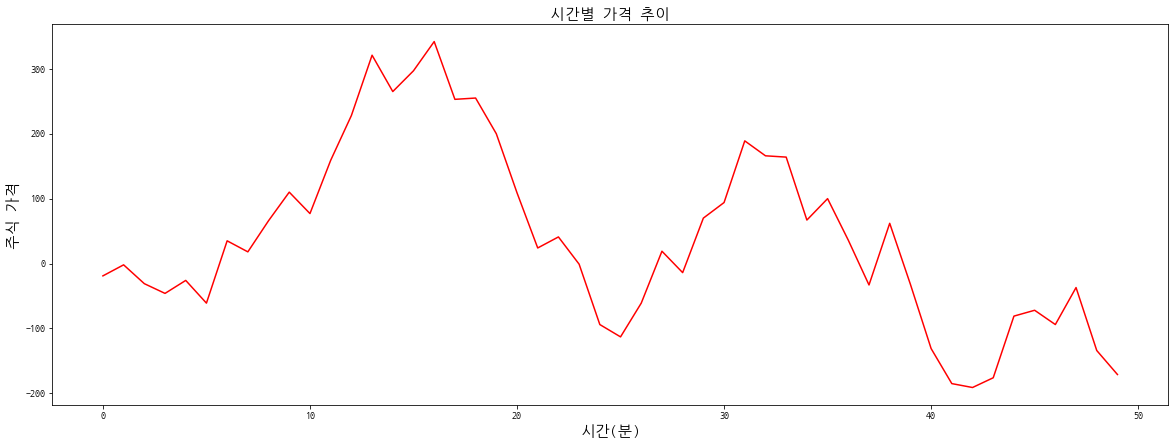

In [11]:
# 1. FontProperties를 사용하는 방법 => 그래프의 폰트가 필요한 항목마다 지정해줘야 한다.
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다.
# matplotlib.pyplot => title(), xlabel(), ylabel(), legend(), text()
# matplotlib.axes => set_title()

# fname 옵션을 사용한다.
path =  'C:\\Windows\\Fonts\\나눔고딕코딩.ttf'

fontprop = fm.FontProperties(fname=path, size=15)

plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

In [12]:
# 2. matplotlib 라이브러리의 rcParams[]로 전역 글꼴 설정
# 기본 설정 읽기
print('기본 설정된 폰트 크기 : ', plt.rcParams['font.size'])
print('기본 설정된 폰트 설정 : ', plt.rcParams['font.family'])

기본 설정된 폰트 크기 :  10.0
기본 설정된 폰트 설정 :  ['NanumGothicCoding']


In [13]:
# 2-1
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding'

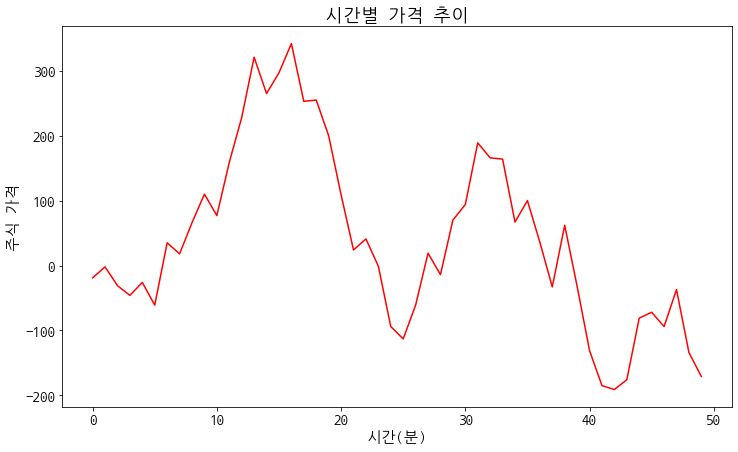

In [14]:
plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (20, 7)
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.show()

NanumGothicCoding


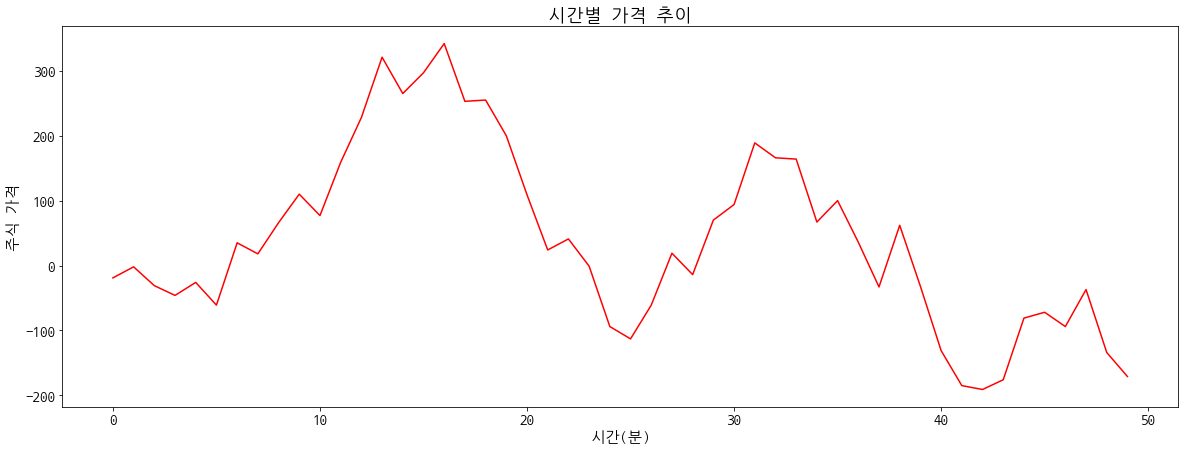

In [15]:
# 2-2
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법이 있다.
path =  'C:\\Windows\\Fonts\\나눔고딕코딩.ttf'
font_name = fm.FontProperties(fname=path, size=15).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (20, 7)
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.show()

In [16]:
# 3. rcParams를 matplotlib 설정 파일에 직접 넣어준다. => 모든 쥬피터 노트북에 공통 적용된다.
# font.family:  NanumGothicCoding
# 이곳에 폰트를 지정해 주면 쥬피터 노트묵을 실행할 때 마다 바로 글꼴이 로드되도록 설정할 수 있다.

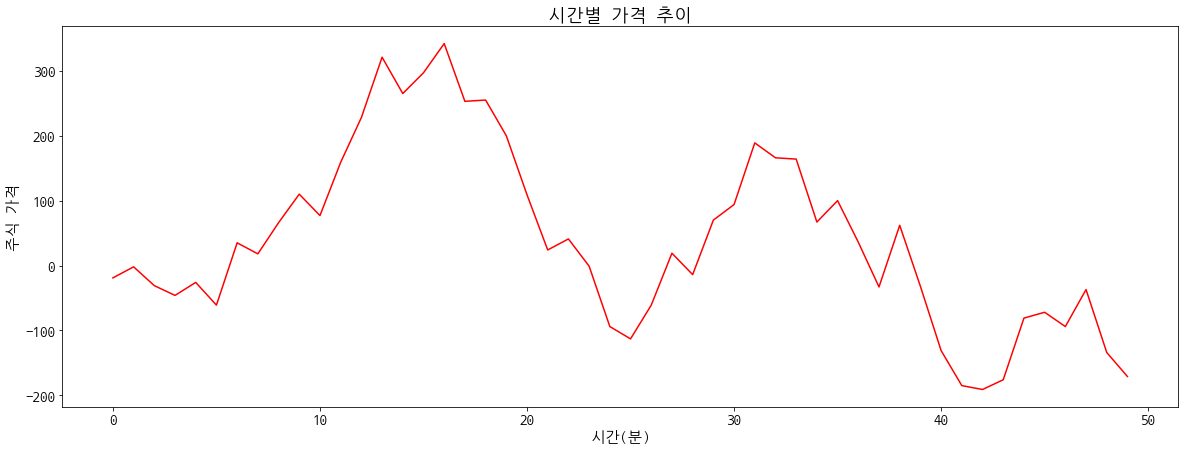

In [17]:
plt.plot(range(50), data, 'r')
plt.rcParams['figure.figsize'] = (20, 7)
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.show()